**Data Science**

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Housing DataSets from file**

In [13]:
housing_df = pd.read_csv('housing.csv')
housing_addresses = pd.read_csv('housing_addresses.csv')

**QUESTION-01: First 3 records of both table**

In [19]:
print('Housing Data\n'   , housing_df.head(3))
print('\n\nHousing Addresses Data\n', housing_addresses.head(3))

Housing Data
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  


Housing Addresses Data
    postal_code      city  population
0      67543.0  Berkeley        5000
1      90876.0   Oakland        7000
2      94618.0  Piedmont        3000


**rename the column “postal_code” in the “housing_addresses” table to “zip_code”.**

In [21]:
housing_addresses.rename(columns={'postal_code':'zip_code'}, inplace=True)
print('\nafter rename the column\n\n', housing_addresses.head(3))


after rename the column

    zip_code      city  population
0   67543.0  Berkeley        5000
1   90876.0   Oakland        7000
2   94618.0  Piedmont        3000


**Adding a new column to the “housing_data” data frame named “zip_code”**

In [22]:
housing_df['zip_code'] = np.nan
print('\n\nAfter Adding new column\n\n' ,housing_df.head(3))



After Adding new column

    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   

   zip_code  
0       NaN  
1       NaN  
2       NaN  


**Populate the new added column “zip_code” with the following list of values**

In [25]:
zip_code = ["94705.0", "94611.0", "94618.0", "95935.0", "95972.0", "95962.0"]
housing_df['zip_code'] = np.random.choice(zip_code, size=len(housing_df))
print('\n\nAfter populating the new added column\n\n' ,housing_df.head(3))



After populating the new added column

    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   

  zip_code  
0  94705.0  
1  94611.0  
2  94618.0  


**Creating merged data frame**

In [29]:
housing_df['zip_code'] = housing_df['zip_code'].astype(str)
housing_addresses['zip_code'] = housing_addresses['zip_code'].astype(str)

L1F19BSCS0582_df = pd.merge(housing_df, housing_addresses, on='zip_code', how = 'inner')
print('\n\nMerged data frame\n\n' ,L1F19BSCS0582_df.head(3))



Merged data frame

    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.24     37.85                52.0       1467.0           190.0   
1    -122.25     37.85                52.0       1274.0           235.0   
2    -122.25     37.84                52.0       3104.0           687.0   

   population_x  households  median_income  median_house_value  \
0         496.0       177.0         7.2574            352100.0   
1         558.0       219.0         5.6431            341300.0   
2        1157.0       647.0         3.1200            241400.0   

  ocean_proximity zip_code          city  population_y  
0        NEAR BAY  94618.0      Piedmont          3000  
1        NEAR BAY  94618.0      Piedmont          3000  
2        NEAR BAY  95962.0  Oregon House           600  


**Bar Chart**

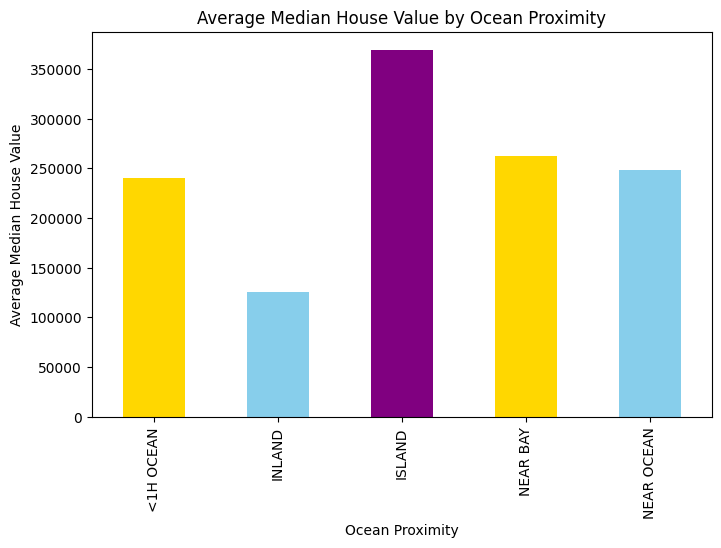

In [42]:
avg_values = L1F19BSCS0582_df.groupby('ocean_proximity')['median_house_value'].mean()
plt.figure(figsize=(8, 5))

colors = ['#FFD700', '#87CEEB', '#800080']
avg_values.plot(kind='bar', color=colors)

plt.title('Average Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Average Median House Value')
plt.show()

**Scatter Plot**

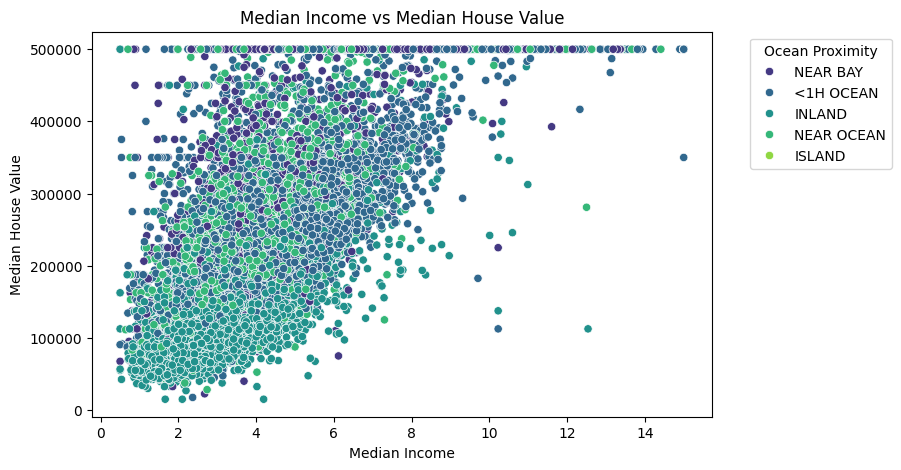

In [43]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=L1F19BSCS0582_df, x='median_income', y='median_house_value', hue='ocean_proximity', palette='viridis')
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend(title="Ocean Proximity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Histogram**

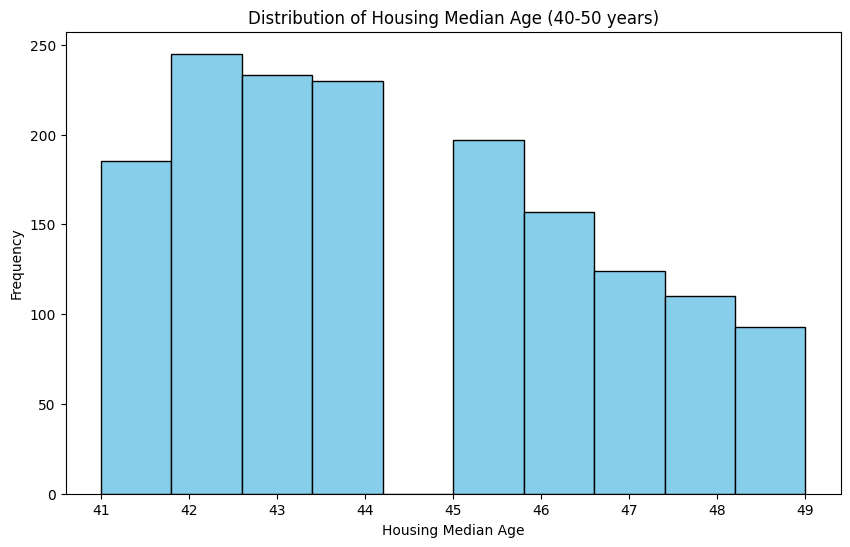

In [47]:
age_filtered = L1F19BSCS0582_df[(L1F19BSCS0582_df['housing_median_age'] > 40) & (L1F19BSCS0582_df['housing_median_age'] < 50)]
plt.figure(figsize=(10, 6))
plt.hist(age_filtered['housing_median_age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Housing Median Age (40-50 years)")
plt.xlabel("Housing Median Age")
plt.ylabel("Frequency")
plt.show()

**Pie Chart**

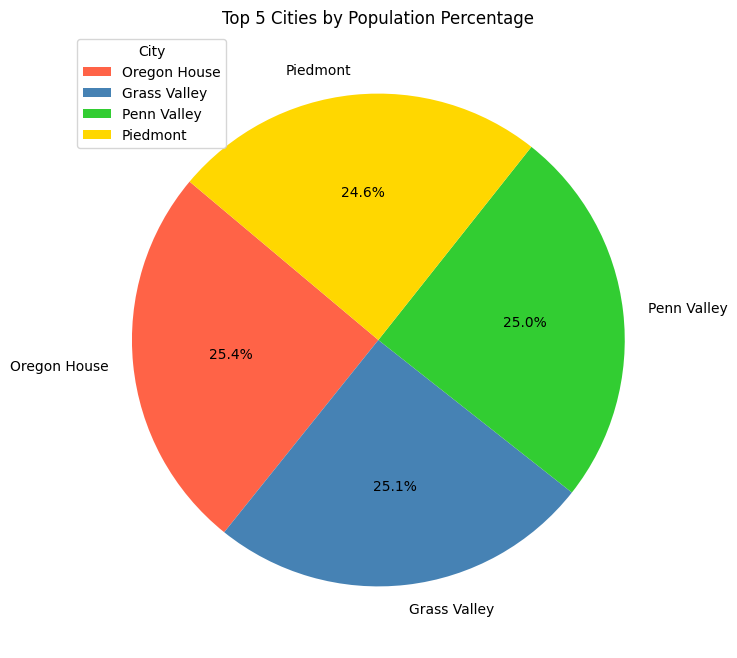

In [49]:
top_cities = L1F19BSCS0582_df.groupby('city')['population_x'].sum().nlargest(5)
plt.figure(figsize=(8, 8))

custom_colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#DA70D6']

plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title("Top 5 Cities by Population Percentage")
plt.legend(title="City", loc="best")
plt.show()